In [1]:
import json
import pickle
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from utils.amt_inout import bounded_curve, bounded_sigmoid
from utils.stock_loader import Loader

In [2]:
SYM = 'EMB'  # emerging markets
START = '1965-01-01'
PARAM_PATH = '../data/inout_params_emb.pkl'
loader = Loader([SYM], START)
df = loader.download()
df.set_index('Date', drop=True, inplace=True)
df.columns = [
    'open', 'high', 'low', 'close', 'value', 'logval',
    'intraday_change', 'day_to_day_change', 'overnight_change']
df.logval.fillna(method='ffill')
for adj in ['overnight_change', 'day_to_day_change']:
    df[adj] = pd.Series(
        np.concatenate([df[adj].values[1:], [np.nan]]), index=df.index)
print(df.shape)
df.head(10)

[*********************100%%**********************]  1 of 1 completed


Generating derived columns...
(4165, 9)


,open,high,low,close,value,logval,intraday_change,day_to_day_change,overnight_change
Date,,,,,,,,,
2008-01-02,101.150002,101.529999,101.150002,101.489998,45.943821,3.827419,1.003361,1.001774,1.002759
2008-01-03,101.769997,101.769997,101.669998,101.669998,46.025311,3.829191,0.999017,1.000491,1.000688
2008-01-04,101.739998,101.739998,101.660004,101.720001,46.047928,3.829683,0.999803,1.002262,1.001376
2008-01-07,101.860001,101.949997,101.690002,101.949997,46.152069,3.831942,1.000884,1.002452,1.002747
2008-01-08,102.230003,102.230003,101.239998,102.199997,46.265228,3.834391,0.999706,0.999217,1.000196
2008-01-09,102.220001,102.220001,102.120003,102.120003,46.229012,3.833608,0.999022,1.000882,0.999706
2008-01-10,102.089996,102.209999,102.089996,102.209999,46.269775,3.834489,1.001175,0.996379,0.998141
2008-01-11,102.019997,102.070000,101.839996,101.839996,46.102253,3.830862,0.998236,1.003438,1.002553
2008-01-14,102.099998,102.190002,102.099998,102.190002,46.260735,3.834294,1.000882,1.001663,1.000685


In [3]:
df.isnull().sum()

open                 0
high                 0
low                  0
close                0
value                0
logval               0
intraday_change      0
day_to_day_change    1
overnight_change     1
dtype: int64

In [4]:
df.fillna(method='ffill', inplace=True)
df.isnull().sum()

open                 0
high                 0
low                  0
close                0
value                0
logval               0
intraday_change      0
day_to_day_change    0
overnight_change     0
dtype: int64

In [5]:
df.high[(df.high != df.low)]

Date
2008-01-02    101.529999
2008-01-03    101.769997
2008-01-04    101.739998
2008-01-07    101.949997
2008-01-08    102.230003
                 ...    
2024-07-15     90.260002
2024-07-16     90.309998
2024-07-17     90.099998
2024-07-18     90.000000
2024-07-19     89.584999
Name: high, Length: 4161, dtype: float64

In [6]:
SIM_START = pd.to_datetime('2010-01-04')  # first day of legit open/close values
SIM_START

Timestamp('2010-01-04 00:00:00')

In [7]:
len(df.index >= SIM_START)

4165

In [8]:
df[df.index >= SIM_START]

,open,high,low,close,value,logval,intraday_change,day_to_day_change,overnight_change
Date,,,,,,,,,
2010-01-04,101.739998,101.930000,101.330002,101.930000,51.884304,3.949016,1.001868,1.006082,1.002747
2010-01-05,102.209999,102.580002,102.070000,102.550003,52.199886,3.955080,1.003327,1.001365,1.000488
2010-01-06,102.599998,102.750000,102.230003,102.690002,52.271156,3.956445,1.000877,0.994839,0.996981
2010-01-07,102.379997,102.510002,102.099998,102.160004,52.001381,3.951270,0.997851,1.001175,1.001175
2010-01-08,102.279999,102.489998,102.180000,102.279999,52.062458,3.952444,1.000000,1.007626,1.007235
...,...,...,...,...,...,...,...,...,...
2024-07-15,90.260002,90.260002,89.769997,89.889999,89.889999,4.498587,0.995901,1.004450,1.001891
2024-07-16,90.059998,90.309998,90.010002,90.290001,90.290001,4.503027,1.002554,0.996456,0.996788
2024-07-17,90.000000,90.099998,89.900002,89.970001,89.970001,4.499476,0.999667,0.994776,0.999444


In [9]:
def get_random_params():
    k = np.random.uniform(1, 10)
    if np.random.choice([True, False]):
        k = 1/k
    return {
        'time_param': np.random.randint(5, 250),
        'method':     np.random.choice(['ew', 'ma', 'linear']), #'linear_ma']),
        't':          np.random.uniform(0, 1),
        'k':          k,
        'as_q':       np.random.choice([True, False]),
        'transform_f': np.random.choice(['bounded_curve', 'bounded_sigmoid'])}

In [10]:
def tweak_best_params(params, factor=2, numeric_only=False):
    '''A small factor should have values very close to current, larger
    values allow wilder fluctuations'''
    time = params['time_param']
    upper = time * factor
    diff = upper - time
    time = np.random.randint(time - diff, upper)
    time = min(max(5, time), 1000)
    
    method = params['method']
    if not numeric_only:
        meths = ['ew', 'ma', 'linear_ma', 'linear']
        idx = meths.index(method)
        ps = np.array([1, 1, 1, 1])
        ps[idx] = factor
        ps = ps / ps.sum()
        method = np.random.choice(meths, p=ps)
    
    t = params['t']
    sd = 1 - 1 / (factor/2 + 1)
    t = min(max(np.random.normal(t, scale=sd), 0.001), 0.999)
    
    k = params['k']
    upper = k * factor
    diff = upper - k
    k = np.random.uniform(k - diff, upper)
    k = min(max(1/10, k), 10)
    
    as_q = params['as_q'] if numeric_only else np.random.choice([True, False]) 
    
    current_transform = params['transform_f']
    other_transform = 'bounded_curve' if current_transform == 'bounded_sigmoid' else 'bounded_sigmoid'
    p_current = 1 / factor
    transform_f = np.random.choice([current_transform, other_transform], p=[p_current, 1 - p_current])
    return {
        'time_param': time,
        'method': method,
        't': t,
        'k': k,
        'as_q': as_q,
        'transform_f': transform_f}

In [11]:
def get_ma(series: pd.Series, time_param: float | int, method: str):
    '''Calculate the moving average
    Args:
    - method: 'ew' | 'ma' | 'linear' | 'linear_ma'
    - time_param:
      - ew=True: (real) the halflife of the exponential weights (no. 
          of  time periods it takes for weight to drop from 1 to 0.5)
      - ew=False: (int) the ma window, or number of days to average 
   over
    '''
    if method == 'ew':
        trend = series.ewm(halflife=time_param, ignore_na=True).mean()
    elif method == 'ma':
        trend = series.rolling(window=int(time_param)).mean()
    elif method.startswith('linear'):
        trend = (series).rolling(window=int(time_param)).apply(lambda x: (x[-1] + x[0]) / 2)
        if method == 'linear_ma':
            trend = trend.rolling(window=int(time_param)).mean()
        trend.fillna(method='bfill', inplace=True)
    return trend

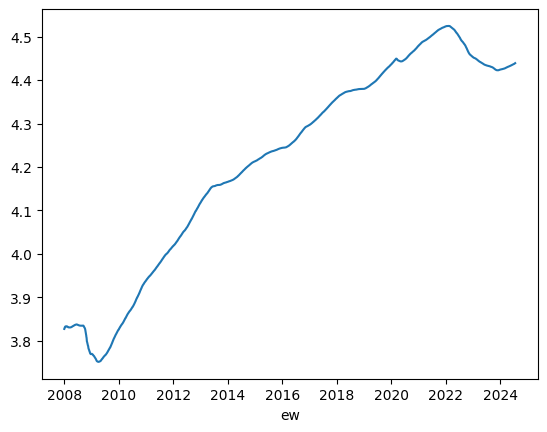

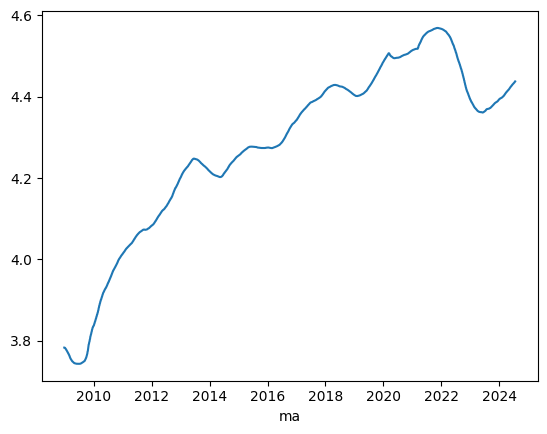

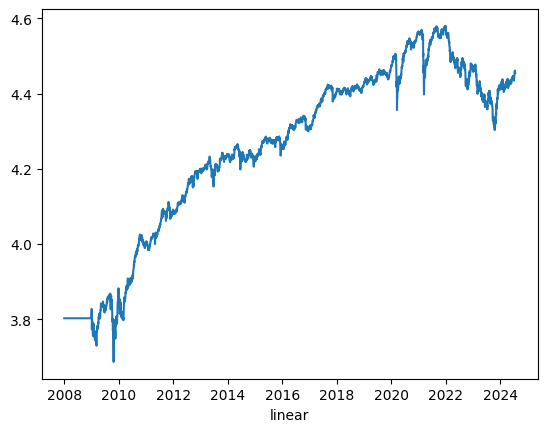

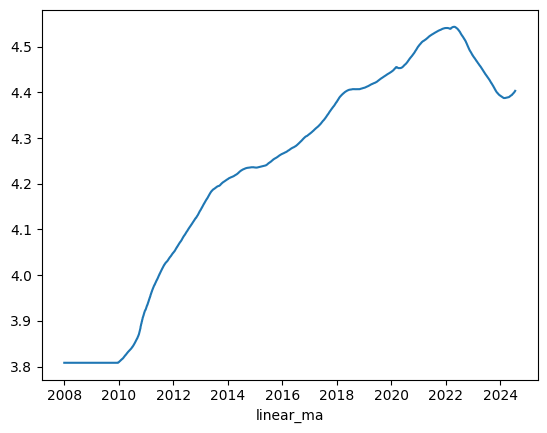

In [12]:
for method in ['ew', 'ma', 'linear', 'linear_ma']:
    plt.plot(get_ma(df.logval, 250, method))
    plt.xlabel(method)
    plt.show()

In [13]:
def get_trend_multiple(series, time_param, method, as_q):
    'Get deviates (as quantiles) relative to trend'
    trend = get_ma(series, time_param, method)
    factor = series / trend
    if as_q:
        factor = factor.rank() / len(factor)
    return factor

In [14]:
def rescale_minmax(series, mn=0, mx=1):
    s = series.copy()
    out_rng = mx - mn
    obs_min = s.min()
    s -= obs_min
    obs_max = s.max()
    s /= obs_max
    s *= out_rng
    s += mn
    return s

In [15]:
def calculate_next_row(row):
    invested = row.invested * row.overnight_change
    total = invested + row.reserve
    target_in = total * row.amt_in
    diff = target_in - invested  # if diff+ buy; - sell
    invested += diff
    reserve = row.reserve - diff
    invested *= row.day_to_day_change
    return invested, reserve, invested + reserve

In [16]:
def simulate(df, params):
    df['trend_factor'] = rescale_minmax(
        get_trend_multiple(
            df.logval,
            params['time_param'],
            method=params['method'],
            as_q=params['as_q']))
    if params['transform_f'] == 'bounded_curve':
        df['amt_in'] = bounded_curve(
            df.trend_factor, params['t'], params['k'], 'down')
    elif params['transform_f'] == 'bounded_sigmoid':
        df['amt_in'] = bounded_sigmoid(
            df.trend_factor, params['t'], params['k'], 'down')
    df = df.loc[df.index >= SIM_START, :].copy()
    df['invested'] = np.nan
    df['reserve'] = np.nan
    df['total'] = np.nan
    df['invested'][0] = df.amt_in[0]
    df['reserve'][0] = 1 - df.amt_in[0]
    df['total'][0] = 1
    for i in range(len(df) - 1) :
        row = df.iloc[i, :]
        try:
            nxt_idx = df.index[i + 1]
            df.loc[nxt_idx, ['invested', 'reserve', 'total']] = (
                calculate_next_row(row))
        except IndexError:
            break
    return df

In [17]:
def run_simulation(
        df, iters=100, current_best=None, best_params=None, 
        param_select='random', factor=2, numeric_only=False):
    orig_df = df.copy()
    do_nothing_res = orig_df.value[-1] / orig_df.loc[SIM_START, 'value']
    print('Do nothing res:', do_nothing_res)
    if current_best is None:
        current_best = 0
    for i in range(iters):
        print('Round', i + 1, end=': ')
        if i == 0 and best_params is not None and param_select == 'random':
            params = best_params  # rerun again on new data
            current_best = 0 
        elif param_select == 'random':
            params = get_random_params()
        else:
            params = (
                tweak_best_params(best_params, factor, numeric_only=numeric_only)
                if best_params is not None else get_random_params())
        df = simulate(orig_df.copy(), params)
        final = df.total[-1]
        print(final)
        if np.isnan(final):
            continue
            #return df, params
        if final > current_best:
            current_best = final
            best_params = params
            print('New best:', current_best)
            print(params)
            plt.plot(df.total, label='best')
            plt.plot(df.value / df.value[0], label='S&P')
            plt.yscale('log')
            plt.legend()
            plt.show()
    return current_best, best_params

In [18]:
try:
    with open(PARAM_PATH, 'rb') as f:
        current_best, best_params = pickle.load(f)
except FileNotFoundError:
    current_best, best_params = None, None
    
current_best, best_params #= None, None

(2.6438449164819033,
 {'time_param': 6,
  'method': 'linear',
  't': 0.8597521934336938,
  'k': 7.887614799063902,
  'as_q': True,
  'transform_f': 'bounded_curve'})

Do nothing res: 1.7203661834995092
Round 1: 2.6341000314934817
New best: 2.6341000314934817
{'time_param': 6, 'method': 'linear', 't': 0.8597521934336938, 'k': 7.887614799063902, 'as_q': True, 'transform_f': 'bounded_curve'}


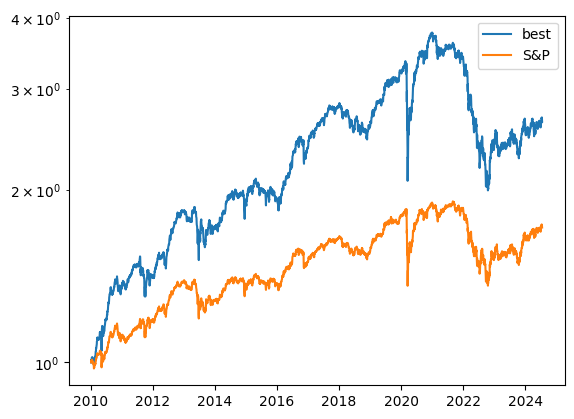

Round 2: 1.203973573799368
Round 3: 1.607695033668282
Round 4: 1.5129928871112703
Round 5: 1.0701773428999635
Round 6: 1.00511035026722
Round 7: 1.480208671758724
Round 8: 2.1076836569147277
Round 9: 2.026818756957849
Round 10: 1.8071035673076155
Round 11: 1.8763389644977702
Round 12: 2.188336450624015
Round 13: 1.6197404794081254
Round 14: 1.0196326295400229
Round 15: 1.1095238685867863
Round 16: 1.0877938726795513
Round 17: 1.2776048417997345
Round 18: 2.3793065762468615
Round 19: 1.2852612215851784
Round 20: 1.0970787701865063
Round 21: 1.6073536298837101
Round 22: 1.0381184219070334
Round 23: 1.8967930022366883
Round 24: 2.233924006065597
Round 25: 1.6429107439366843
Round 26: 1.4563433144789246
Round 27: 1.0495011778898173
Round 28: 1.0756788420237853
Round 29: 2.3887279120794322
Round 30: 2.1320738363256915
Round 31: 1.239886923068289
Round 32: 1.5487646038106264
Round 33: 1.2561424970131152
Round 34: 2.0395040976494982
Round 35: 1.1425890425994691
Round 36: 1.6049699768190948
Ro

In [19]:
best_out, params_out = run_simulation(
    df.copy(), current_best=current_best, best_params=best_params)

In [20]:
# initially [1/4, 1/2, 1, 2]
for w in [16, 32, 64, 128]:  # bigger w -> smaller factor -> smaller changes
    factor = 1 + (1/w)
    print('Factor:', factor)
    best_out, params_out = run_simulation(
        df.copy(), 
        iters=25, 
        current_best=best_out, 
        best_params=params_out, 
        param_select='tweak',
        factor=factor,  # closer to 1: small changes; bigger: bigger
        numeric_only=True) 
    print()

Factor: 1.0625
Do nothing res: 1.7203661834995092
Round 1: 2.4282850688657804
Round 2: 2.4282851821500735
Round 3: 2.406479868447568
Round 4: 2.190489537748305
Round 5: 2.4547176030657445
Round 6: 2.428283991441525
Round 7: 2.428286038302483
Round 8: 2.3244771672882383
Round 9: 1.5008041458909842
Round 10: 2.494006630241402
Round 11: 2.2078232855778515
Round 12: 2.4323312545156117
Round 13: 2.218727565107719
Round 14: 2.2964909929404227
Round 15: 2.478967088312849
Round 16: 2.4511361868712234
Round 17: 2.3852087333908836
Round 18: 2.428286334923119
Round 19: 2.4463661854251546
Round 20: 2.42828474960852
Round 21: 2.409157923593629
Round 22: 2.4282823874452473
Round 23: 2.4845154296610477
Round 24: 2.3835099858785442
Round 25: 2.3227354261096758

Factor: 1.03125
Do nothing res: 1.7203661834995092
Round 1: 2.427249443341026
Round 2: 2.4101404837127176
Round 3: 2.4282839403197163
Round 4: 2.4282838901400425
Round 5: 2.4281927644898937
Round 6: 2.466545197234309
Round 7: 2.428284528820132


In [21]:
# Force set:
#best_out = 1.785863355710255
#params_out = {'time_param': 160, 'method': 'linear', 't': 0.8604701020371026, 'k': 6.0009414899488185, 'as_q': True, 'transform_f': 'bounded_sigmoid'}

In [22]:
final_out = simulate(df, params_out)

In [23]:
amt_in = final_out['amt_in'][-1]
amt_in

1.0

In [24]:
trend_fac = final_out['trend_factor'][-1]
trend_fac

0.1304034582132565

In [25]:
params_out

{'time_param': 6,
 'method': 'linear',
 't': 0.8597521934336938,
 'k': 7.887614799063902,
 'as_q': True,
 'transform_f': 'bounded_curve'}

/Users/damiansp/Learning/marketModeling/notebooks/../utils/amt_inout.py:24: RuntimeWarning: divide by zero encountered in power
  y = 1 / (1 + x**(np.log(2) / np.log(t)) - 1) ** k


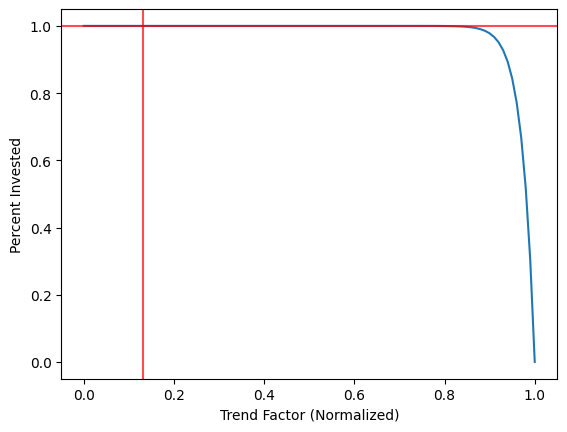

In [26]:
xs = np.linspace(0, 1, 101)
if params_out['transform_f'] == 'bounded_curve':
    ys = bounded_curve(xs, params_out['t'], params_out['k'], 'down')
else:
    ys = bounded_sigmoid(xs, params_out['t'], params_out['k'], 'down')
plt.xlabel('Trend Factor (Normalized)')
plt.ylabel('Percent Invested')
plt.plot(xs, ys)
plt.axhline(amt_in, color='r', alpha=0.7)
plt.axvline(trend_fac, color='r', alpha=0.7);

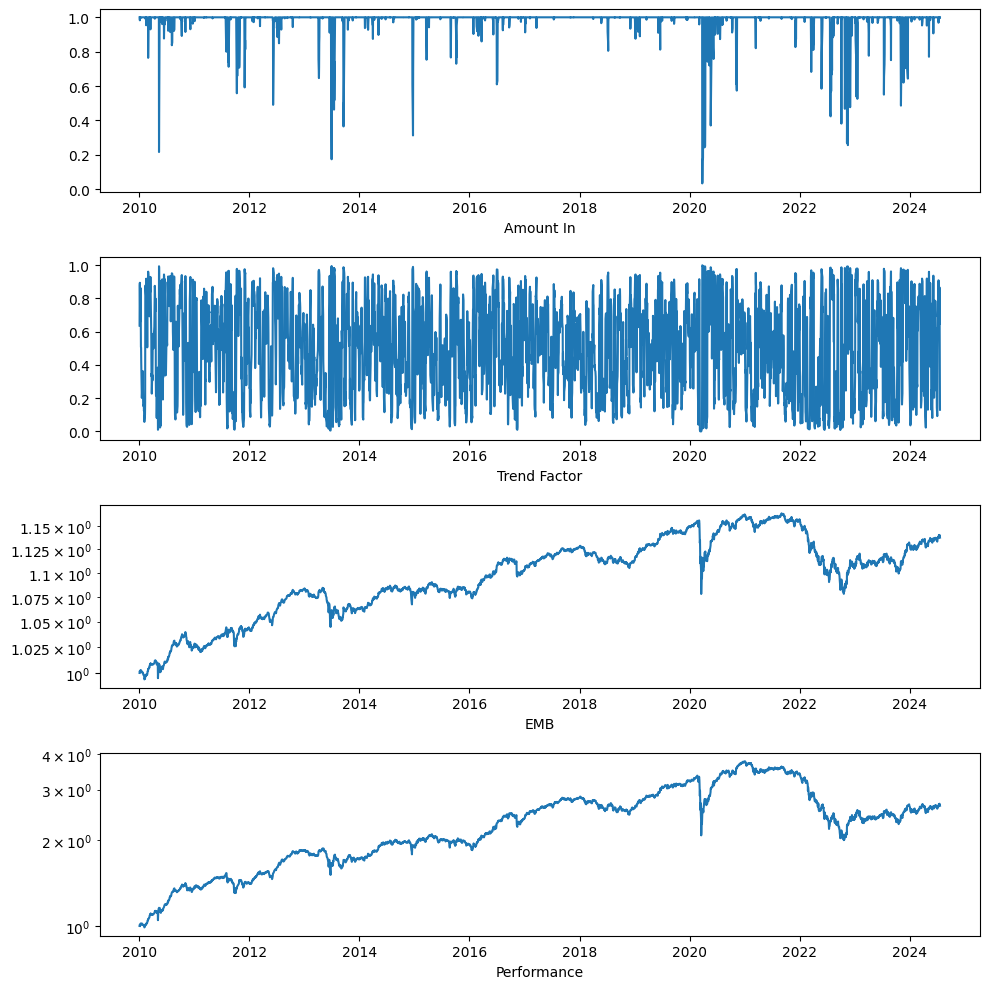

In [27]:
plt.figure(figsize=(10, 10))
plt.subplot(4, 1, 1)
plt.plot(final_out.amt_in)
plt.xlabel('Amount In')

plt.subplot(4, 1, 2)
plt.plot(final_out.trend_factor)
plt.xlabel('Trend Factor')

plt.subplot(4, 1, 3)
plt.plot(final_out.logval / final_out.logval[0])
plt.xlabel('EMB')
plt.yscale('log')

plt.subplot(4, 1, 4)
plt.plot(final_out.total)
plt.xlabel('Performance')
plt.yscale('log')
plt.tight_layout();

In [28]:
N = 500
#plt.figure(figsize=(10, 10))
#plt.subplot(4, 1, 1)
#plt.plot(final_out.amt_in[:N])
#plt.xlabel('Amount In')

#plt.subplot(4, 1, 2)
#plt.plot(final_out.trend_factor[:N])
#plt.xlabel('Trend Factor')

#plt.subplot(4, 1, 3)
#plt.plot((final_out.logval / final_out.logval[0])[:N])
#plt.xlabel('EMB')
#plt.yscale('log')

#plt.subplot(4, 1, 4)
#plt.plot(final_out.total[:N])
#plt.xlabel('Performance')
#plt.yscale('log')
#plt.tight_layout();

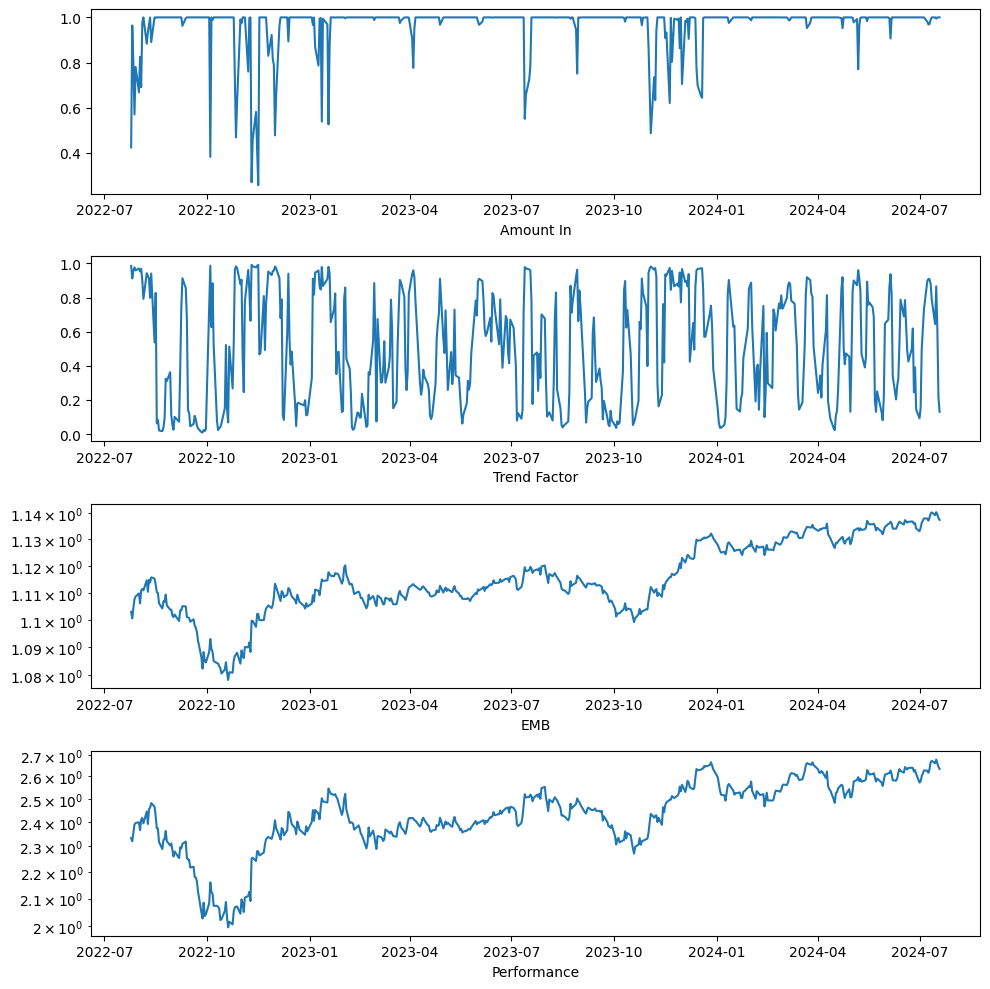

In [29]:
plt.figure(figsize=(10, 10))
plt.subplot(4, 1, 1)
plt.plot(final_out.amt_in[-N:])
plt.xlabel('Amount In')

plt.subplot(4, 1, 2)
plt.plot(final_out.trend_factor[-N:])
plt.xlabel('Trend Factor')

plt.subplot(4, 1, 3)
plt.plot((final_out.logval / final_out.logval[0])[-N:])
plt.xlabel('EMB')
plt.yscale('log')

plt.subplot(4, 1, 4)
plt.plot(final_out.total[-N:])
plt.xlabel('Performance')
plt.yscale('log')
plt.tight_layout();

In [30]:
frac_in = round(final_out['amt_in'][-1], 4)
frac_in

1.0

In [31]:
# n days
n = (df.index >= SIM_START).sum()
# n years
t = n / 250
# amt at start
p = df.loc[SIM_START, 'value']
amt = df.iloc[-1].value
p, t, amt

(51.88430404663086, 14.64, 89.26000213623047)

In [32]:
# annualized rate of return
r = best_out**(1/t) 
r - 1

0.06839466813062378

In [33]:
with open('daily_params.json', 'r') as f_in:
    j = json.load(f_in)
    with open('daily_params.json', 'w') as f_out:
        j['emb'] = [r, frac_in]
        print(j)
        json.dump(j, f_out)

{'sp': [1.1174873659325364, 0.9999], 'nas': [1.2275959942624421, 0.9982], 'rus': [1.2680366015016034, 1.0], 'jpxn': [1.0672456187347374, 0.0], 'ktec': [1.6599402811386, 0.0], 'emb': [1.0683946681306238, 1.0], 'gdx': [1.3355529773650587, 0.2463], 'dia': [1.2015064238720055, 1.0]}


In [34]:
stop

NameError: name 'stop' is not defined

In [35]:
with open(PARAM_PATH, 'wb') as f:
    pickle.dump([best_out, params_out], f)
    
best_out, params_out

(2.6341000314934817,
 {'time_param': 6,
  'method': 'linear',
  't': 0.8597521934336938,
  'k': 7.887614799063902,
  'as_q': True,
  'transform_f': 'bounded_curve'})